In [1]:
# import
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import PIL
from glob import glob

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from keras.applications.vgg16 import VGG16
from keras.layers import Dense

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

데이터 불러오기

In [2]:
df = pd.read_csv('test.csv')
df

,id,img_path
0,TEST_000,./test/000.png
1,TEST_001,./test/001.png
2,TEST_002,./test/002.png
3,TEST_003,./test/003.png
4,TEST_004,./test/004.png
...,...,...
787,TEST_787,./test/787.png
788,TEST_788,./test/788.png
789,TEST_789,./test/789.png
790,TEST_790,./test/790.png


데이터 전처리

In [48]:
for dirname, _, filenames in os.walk('./test/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./test/000.png
./test/001.png
./test/002.png
./test/003.png
./test/004.png
./test/005.png
./test/006.png
./test/007.png
./test/008.png
./test/009.png
./test/010.png
./test/011.png
./test/012.png
./test/013.png
./test/014.png
./test/015.png
./test/016.png
./test/017.png
./test/018.png
./test/019.png
./test/020.png
./test/021.png
./test/022.png
./test/023.png
./test/024.png
./test/025.png
./test/026.png
./test/027.png
./test/028.png
./test/029.png
./test/030.png
./test/031.png
./test/032.png
./test/033.png
./test/034.png
./test/035.png
./test/036.png
./test/037.png
./test/038.png
./test/039.png
./test/040.png
./test/041.png
./test/042.png
./test/043.png
./test/044.png
./test/045.png
./test/046.png
./test/047.png
./test/048.png
./test/049.png
./test/050.png
./test/051.png
./test/052.png
./test/053.png
./test/054.png
./test/055.png
./test/056.png
./test/057.png
./test/058.png
./test/059.png
./test/060.png
./test/061.png
./test/062.png
./test/063.png
./test/064.png
./test/065.png
./test/066

In [49]:
base_dir = './train/'
data = []
for dirname, _, filenames in os.walk(base_dir):
    for filename in filenames:
        # 경로에서 \를 /로 변경하여 출력
        image_path = os.path.join(dirname, filename).replace("\\", "/")
        category = dirname.split("/")[-1]
        data.append({'Category': category, 'Image_Path': image_path})
        print(image_path)

train_df = pd.DataFrame(data)
train_df

./train/damage/0.png
./train/damage/1.png
./train/damage/10.png
./train/damage/100.png
./train/damage/1000.png
./train/damage/1001.png
./train/damage/1002.png
./train/damage/1003.png
./train/damage/1004.png
./train/damage/1005.png
./train/damage/1006.png
./train/damage/1007.png
./train/damage/1008.png
./train/damage/1009.png
./train/damage/101.png
./train/damage/1010.png
./train/damage/1011.png
./train/damage/1012.png
./train/damage/1013.png
./train/damage/1014.png
./train/damage/1015.png
./train/damage/1016.png
./train/damage/1017.png
./train/damage/1018.png
./train/damage/1019.png
./train/damage/102.png
./train/damage/1020.png
./train/damage/1021.png
./train/damage/1022.png
./train/damage/1023.png
./train/damage/1024.png
./train/damage/1025.png
./train/damage/1026.png
./train/damage/1027.png
./train/damage/1028.png
./train/damage/1029.png
./train/damage/103.png
./train/damage/1030.png
./train/damage/1031.png
./train/damage/1032.png
./train/damage/1033.png
./train/damage/1034.png
./tr

,Category,Image_Path
0,damage,./train/damage/0.png
1,damage,./train/damage/1.png
2,damage,./train/damage/10.png
3,damage,./train/damage/100.png
4,damage,./train/damage/1000.png
...,...,...
3452,wall,./train/wall/5.png
3453,wall,./train/wall/6.png
3454,wall,./train/wall/7.png
3455,wall,./train/wall/8.png


카테고리별 이미지 확인

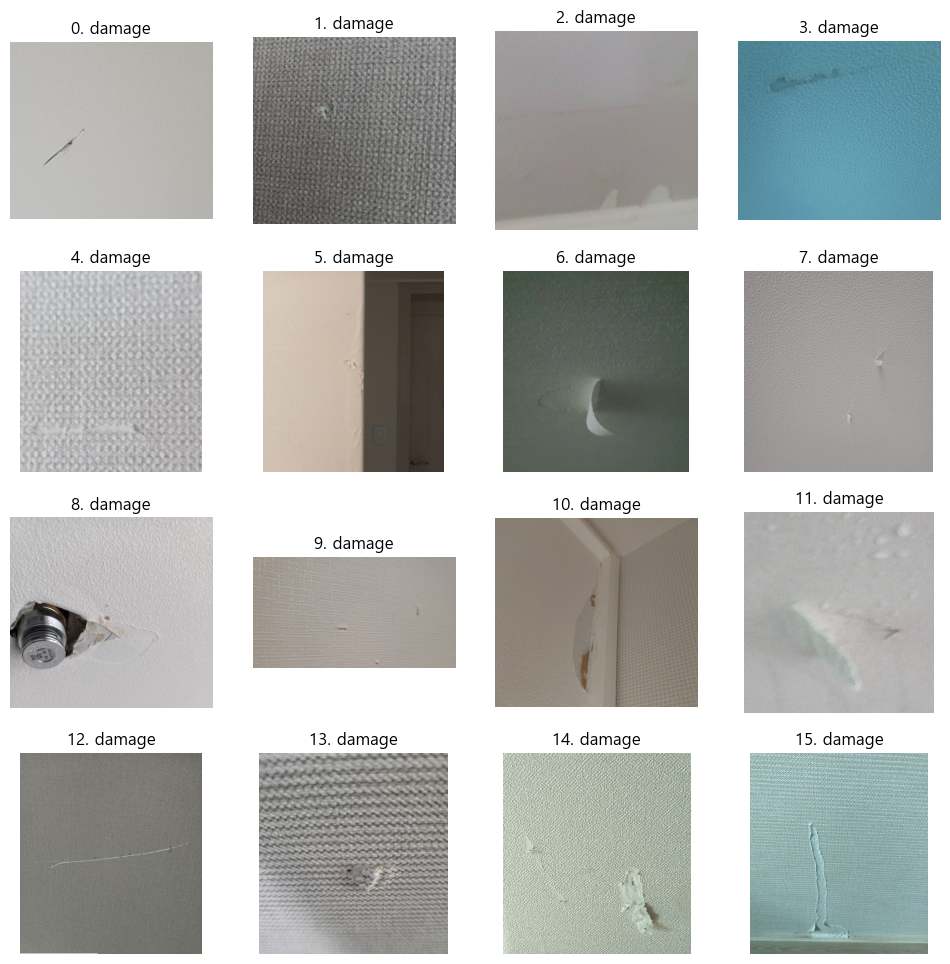

In [50]:
# 실제로 어떤 사진들로 구성되어 있는지 이미지와 라벨 출력하여 확인
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.figure(figsize = (12,12))
for i in range(16):
    image_id = train_df.loc[i, 'Image_Path']
    plt.subplot(4,4, i+1)
    plt.imshow(plt.imread(image_id))
    plt.title(str(i) + '. ' + train_df.loc[i, 'Category'])
    plt.axis('off')

plt.show()

이미지 전처리

In [51]:
import cv2
train_X = []
len(train_df)

for i in range(len(train_df)):

    img = cv2.imread(train_df['Image_Path'][i])
    img = cv2.resize(img, dsize=(224,224))
    img = img / 225.0

    train_X.append(img)

train_X = np.array(train_X)

# 학습데이터의 차원 확인
print(train_X.shape) # (3457, 224, 224, 3)

(3457, 224, 224, 3)


category 문자열 단어 숫자로 변환

In [53]:
train_df['Category'].nunique()

19

In [54]:
# 라벨 인코더 사용
le = LabelEncoder()
train_df['label_category'] = le.fit_transform(train_df['Category'])
train_df

,Category,Image_Path,label_category
0,damage,./train/damage/0.png,1
1,damage,./train/damage/1.png,1
2,damage,./train/damage/10.png,1
3,damage,./train/damage/100.png,1
4,damage,./train/damage/1000.png,1
...,...,...,...
3452,wall,./train/wall/5.png,18
3453,wall,./train/wall/6.png,18
3454,wall,./train/wall/7.png,18
3455,wall,./train/wall/8.png,18


In [55]:
train_Y = train_df['label_category']
train_Y = np.array(train_Y)
print(train_Y)


[ 1  1  1 ... 18 18 18]


모델 학습

In [56]:
# 모델 불러오기
vgg16 = VGG16()

In [57]:
# 원래 모델
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [58]:
# vgg16의 레이어 수
vgg16_layer_list = vgg16.layers
for i in vgg16_layer_list:
    print(i)

In [59]:
# add the layers of vgg16 in my created model 마지막 레이어 제거
vgg16Model = Sequential()
for i in range(len(vgg16_layer_list)-1):
    vgg16Model.add(vgg16_layer_list[i])

In [60]:
vgg16Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [61]:
numberOfClass = len(glob("train" + "/*"))
print("Number Of Class: ", numberOfClass)

Number Of Class:  19


In [62]:
# 예측에 맞게 모델 재정의 -> 19개의 뉴런을 가진 Dense Layer 생성
vgg16Model.add(Dense(numberOfClass, activation = "softmax"))

In [63]:
vgg16Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [64]:
# 컴파일
vgg16Model.compile(loss = "categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

In [65]:
from keras.preprocessing.image import ImageDataGenerator

In [66]:
train_data = ImageDataGenerator().flow_from_directory("./train", target_size = (224,224))

Found 3457 images belonging to 19 classes.


모델 학습

In [228]:
tf.keras.backend.clear_session()

In [107]:
# Traning with model
batch_size = 32

hist_vgg16 = vgg16Model.fit_generator(train_data, 
                                      steps_per_epoch = 1600 // batch_size,
                                      epochs = 10,
                                      validation_steps = 800 // batch_size)

c:\ProgramData\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
50/50 [==============================] - 337s 7s/step - loss: 20.5786 - accuracy: 0.3375
Epoch 2/10
50/50 [==============================] - 335s 7s/step - loss: 2.0624 - accuracy: 0.3975
Epoch 3/10
50/50 [==============================] - 336s 7s/step - loss: 2.0224 - accuracy: 0.4081
Epoch 4/10
50/50 [==============================] - 329s 7s/step - loss: 1.9143 - accuracy: 0.4168
Epoch 5/10
50/50 [==============================] - 340s 7s/step - loss: 1.8114 - accuracy: 0.4244
Epoch 6/10
50/50 [==============================] - 335s 7s/step - loss: 1.8503 - accuracy: 0.4385
Epoch 7/10
50/50 [==============================] - 338s 7s/step - loss: 1.7256 - accuracy: 0.4425
Epoch 8/10
50/50 [==============================] - 331s 7s/step - loss: 1.9496 - accuracy: 0.4302
Epoch 9/10
50/50 [==============================] - 331s 7s/step - loss: 1.8815 - accuracy: 0.4283
Epoch 10/10
50/50 [==============================] - 336s 7s/step - loss: 1.6899 - accuracy: 0.4819


val_accuracy 확인을 위한 split

In [340]:
len(train_data)

109

In [342]:
# 전체 데이터를 불러옴
data_generator = ImageDataGenerator()
data_flow = data_generator.flow_from_directory("./train", target_size=(224, 224))

# 이미지와 레이블을 가져옴
images, labels = data_flow.next()

# 데이터를 훈련 및 테스트 세트로 분할
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# 훈련 데이터 생성기
train_data_generator = ImageDataGenerator()
train_data_flow = train_data_generator.flow(train_images, train_labels)

# 테스트 데이터 생성기 
test_data_generator = ImageDataGenerator()
test_data_flow = test_data_generator.flow(test_images, test_labels)

# 훈련 데이터와 검증 데이터의 샘플 수 출력
print("Train 데이터의 샘플 수:", len(train_labels))
print("Test 데이터의 샘플 수:", len(test_labels))

Found 3457 images belonging to 19 classes.
Train 데이터의 샘플 수: 25
Test 데이터의 샘플 수: 7


In [206]:
img_height = 244
img_width = 244
train_ds = tf.keras.utils.image_dataset_from_directory(
  './train',
  validation_split=0.2,
  subset='training',
  image_size=(224, 224),
  batch_size=32,
  seed=19,
  shuffle=True)

val_ds = tf.keras.utils.image_dataset_from_directory(
  './train',
  validation_split=0.2,
  subset='validation',
  image_size=(224, 224),
  batch_size=32,
  seed=19,
  shuffle=True)

Found 3457 files belonging to 19 classes.
Using 2766 files for training.
Found 3457 files belonging to 19 classes.
Using 691 files for validation.


In [205]:
tf.keras.backend.clear_session()

(VGG16) 일부계층 가중치 초기화 학습

In [207]:
# 모델 불러오기
vgg16_2 = VGG16(input_shape=(224, 224, 3))

In [208]:
vgg16_2.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [209]:
# vgg16의 레이어 수
vgg16_2_layer_list = vgg16_2.layers
for i in vgg16_2_layer_list:
    print(i)

In [210]:
# add the layers of vgg16 in my created model.
vgg16Model_2 = Sequential() 

for i in range(len(vgg16_2_layer_list)-1):
    vgg16Model_2.add(vgg16_2_layer_list[i])

In [211]:
# 예측에 맞게 모델 재정의 -> 19개의 뉴런을 가진 Dense Layer 생성
vgg16Model_2.add(Dense(numberOfClass, activation = "softmax"))

In [212]:
vgg16Model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [213]:
for layer in vgg16Model_2.layers[0:-3]:
    layer.trainable = False

for layer in vgg16Model_2.layers[-3:]:
    layer.trainable = True

vgg16Model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [214]:
# 컴파일
vgg16Model_2.compile(loss="sparse_categorical_crossentropy",
                     optimizer="adam",
                     metrics=["accuracy"])

In [216]:
# Traning with model
batch_size = 32

vgg16Model_2.fit_generator(train_ds, 
                           validation_data = val_ds,
                           epochs = 10,
                           steps_per_epoch = 1600 // batch_size,
                           validation_steps = 800 // batch_size
                           )

Epoch 1/10


c:\ProgramData\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


50/50 [==============================] - ETA: 0s - loss: 4.9238 - accuracy: 0.4706

In [137]:
# 모델 평가
loss, accuracy = vgg16Model_2.evaluate(val_ds)

print("테스트 데이터셋 손실:", loss)
print("테스트 데이터셋 정확도:", accuracy)

NameError: name 'test_data_flow' is not defined

ImageNet

In [80]:
imagenet_model = tf.keras.applications.VGG16(include_top = False,
                                             weights = 'imagenet',
                                             input_shape=(224, 224, 3))
imagenet_model.trainable = False 

58889256/58889256 [==============================] - 2s 0us/step


In [81]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.applications.vgg16.preprocess_input(inputs)
x = imagenet_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(19)(x)
model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 512)               0     

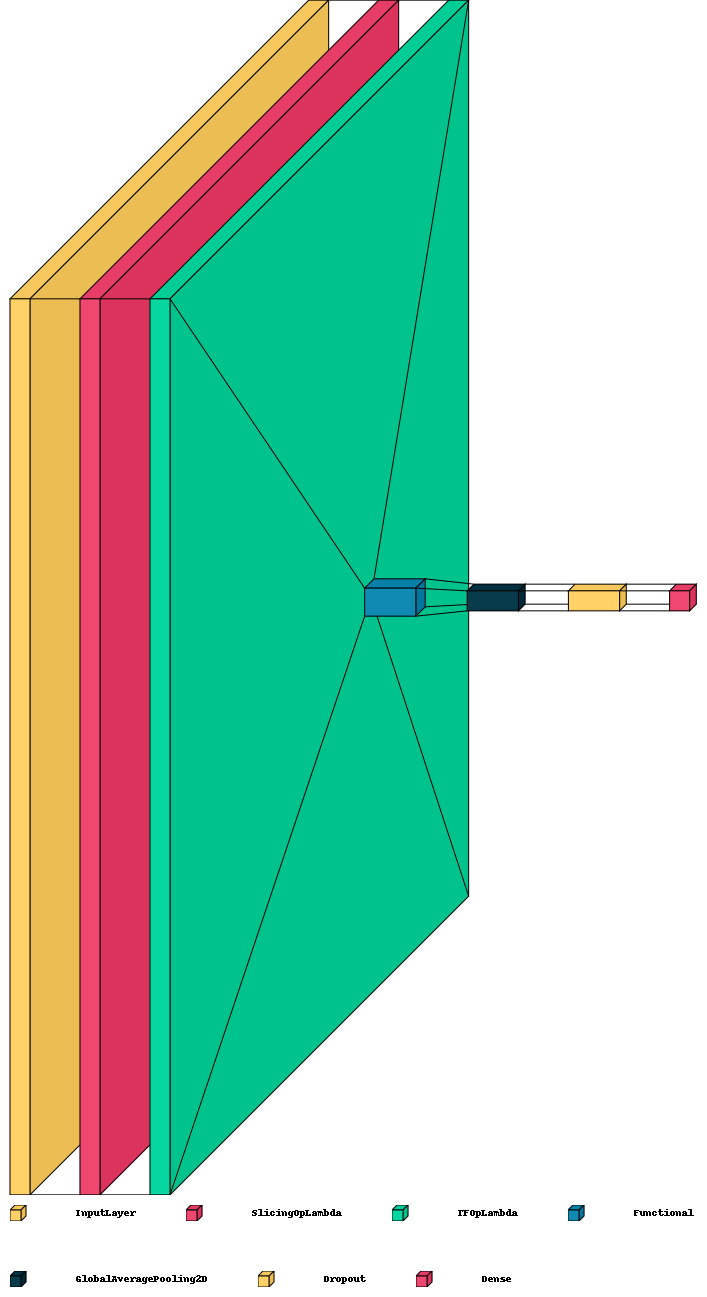

In [88]:
import visualkeras
visualkeras.layered_view(model,legend=True,spacing=50,background_fill = 'white')

In [89]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [90]:
epoch = 10
model.fit(train_ds, validation_data=val_ds, epochs=epoch,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor="val_loss",
            min_delta=1e-2,
            patience=3,
            verbose=1,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10
87/87 [==============================] - 160s 2s/step - loss: 3.2931 - accuracy: 0.2758 - val_loss: 1.8150 - val_accuracy: 0.5094
Epoch 2/10
87/87 [==============================] - 160s 2s/step - loss: 1.8555 - accuracy: 0.4924 - val_loss: 1.4354 - val_accuracy: 0.5601
Epoch 3/10
87/87 [==============================] - 159s 2s/step - loss: 1.4638 - accuracy: 0.5691 - val_loss: 1.2647 - val_accuracy: 0.6107
Epoch 4/10
87/87 [==============================] - 160s 2s/step - loss: 1.2676 - accuracy: 0.6193 - val_loss: 1.1796 - val_accuracy: 0.6194
Epoch 5/10
87/87 [==============================] - 165s 2s/step - loss: 1.1417 - accuracy: 0.6385 - val_loss: 1.0948 - val_accuracy: 0.6527
Epoch 6/10
87/87 [==============================] - 161s 2s/step - loss: 1.0393 - accuracy: 0.6678 - val_loss: 1.0672 - val_accuracy: 0.6729
Epoch 7/10
87/87 [==============================] - 159s 2s/step - loss: 0.9509 - accuracy: 0.6829 - val_loss: 1.0385 - val_accuracy: 0.6773
Epoch 8/10
87

In [93]:
# 모델 평가
loss, accuracy = model.evaluate(val_ds)

print("테스트 데이터셋 손실:", loss)
print("테스트 데이터셋 정확도:", accuracy)

22/22 [==============================] - 28s 1s/step - loss: 1.0072 - accuracy: 0.6744
테스트 데이터셋 손실: 1.0071817636489868
테스트 데이터셋 정확도: 0.6743849515914917


파인튜닝

In [ ]:
# fine tuning
imagenet_model.trainable = True
for layer in imagenet_model.layers[:14]:
    layer.trainable = False
model.summary()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])